In [1]:
import networkx as nx
import random

### 1. find one cut-point and one cut-edge

In [2]:
G = nx.read_edgelist("Network 1.txt")

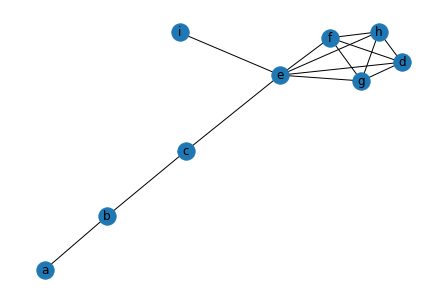

In [3]:
nx.draw(G, with_labels = True)

In [4]:
def cut_point(G):
    all_nodes = list(G.nodes)
    random.shuffle(all_nodes)
    for i in range(len(all_nodes)):
        G2 = G.copy()
        G2.remove_node(all_nodes[i])
        if nx.is_connected(G2) == False:
            return "Cut point: %s" %all_nodes[i]
    return "No cut point!"

In [5]:
def cut_edge(G):
    all_edges = list(G.edges)
    random.shuffle(all_edges)
    for i in range(len(all_edges)):
        G2 = G.copy()
        G2.remove_edge(all_edges[i][0], all_edges[i][1])
        if nx.is_connected(G2) == False:
            return "Cut edge: %s-%s" %(all_edges[i][0], all_edges[i][1])
    return "No cut edge!"

In [6]:
cut_point(G)

'Cut point: e'

In [7]:
cut_edge(G)

'Cut edge: e-c'

### 2. identify two spanning trees of network 1

In [8]:
dfs = nx.dfs_tree(G)

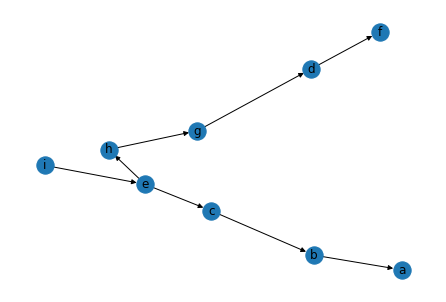

In [9]:
nx.draw(dfs, with_labels = True)

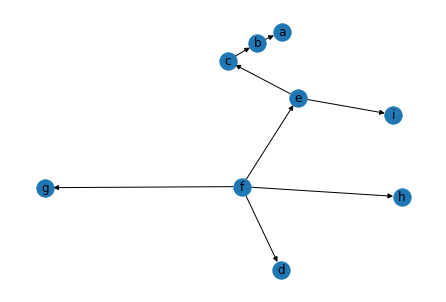

In [10]:
bfs = nx.bfs_tree(G, random.sample(list(G.nodes), 1)[0])
nx.draw(bfs, with_labels = True)

### 3. do following operations on the two identified trees

#### edge complementation

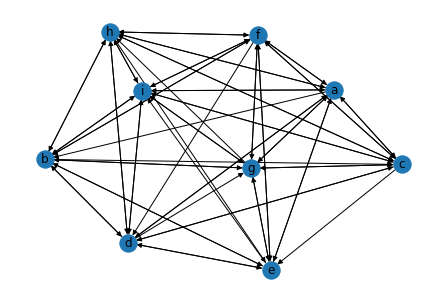

In [12]:
nx.draw(nx.complement(dfs), with_labels = True)

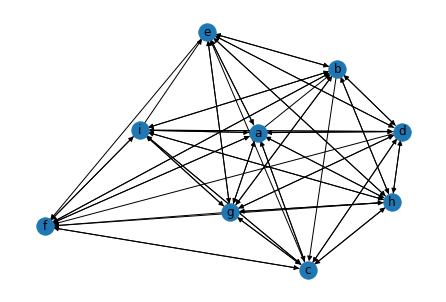

In [13]:
nx.draw(nx.complement(bfs), with_labels = True)

#### join

In [19]:
# bfs of label "letter" to "integer"
joined_tree = nx.compose(dfs, nx.convert_node_labels_to_integers(bfs))

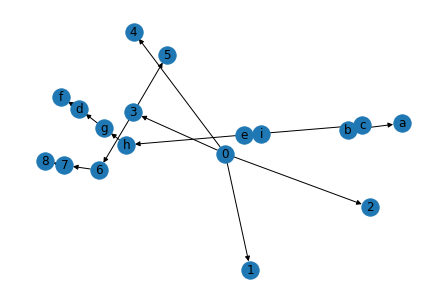

In [20]:
nx.draw(joined_tree, with_labels = True)

#### union

In [148]:
union = nx.compose(dfs, bfs)

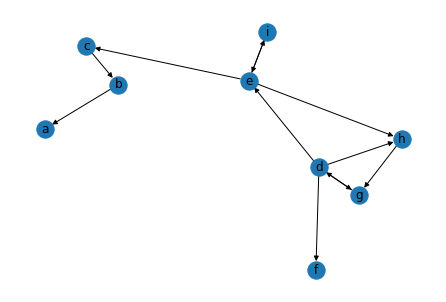

In [149]:
nx.draw(union, with_labels = True)

#### intersection

In [150]:
intersection = nx.intersection(dfs, bfs)

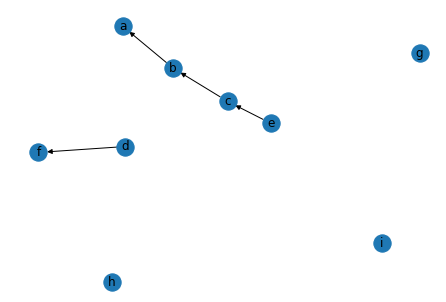

In [151]:
nx.draw(intersection, with_labels = True)

#### difference

#### (DFS - BFS)

In [162]:
difference1 = nx.difference(dfs, bfs)
difference1.remove_nodes_from(list(nx.isolates(difference1)))

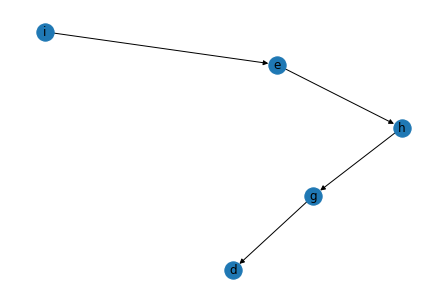

In [163]:
nx.draw(difference1, with_labels = True)

#### (BFS - DFS)

In [158]:
difference2 = nx.difference(bfs, dfs)
difference2.remove_nodes_from(list(nx.isolates(difference2)))

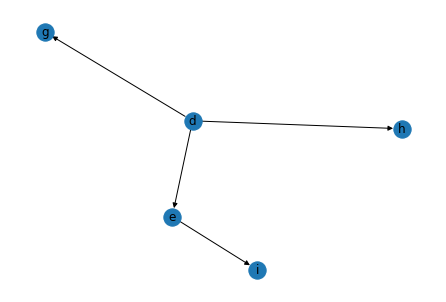

In [164]:
nx.draw(difference2, with_labels = True)